# MAT281 - Laboratorio N°03



<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [5]:
from sklearn.impute import SimpleImputer

df_num= df.drop(['clase_tipo', 'traccion_tipo', 'transmision_tipo', 'combustible_tipo', 'tamano_motor_tipo',
                 'consumo_tipo', 'co2_tipo', 'year'],axis=1)

si = SimpleImputer(strategy='mean')
si.fit(df_num)
df_num= pd.DataFrame(si.fit_transform(df_num))

df_num = df_num.rename(columns={ 0: 'desplazamiento', 1: 'cilindros', 2: 'co2' , 3: 'consumo_litros_milla'})

scaler = MinMaxScaler()
columns = df_num.columns
df_num[columns] = scaler.fit_transform(df_num[columns])

df_num.head()

,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.243590,0.142857,0.398014,0.331027
1,0.461538,0.285714,0.527672,0.475113
2,0.243590,0.142857,0.424351,0.360294
3,0.461538,0.285714,0.527672,0.475113
4,0.410256,0.285714,0.424351,0.360294


In [6]:
df_cat= df.drop(['desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla'],axis=1)
df_cat=pd.get_dummies(df_cat)
df_procesado= pd.merge(df_num.reset_index(), df_cat.reset_index(), on='index', how='left')
df_procesado=df_procesado.drop(['index'],axis=1)
df_procesado

,desplazamiento,cilindros,co2,consumo_litros_milla,year,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.243590,0.142857,0.398014,0.331027,1984,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.461538,0.285714,0.527672,0.475113,1984,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.243590,0.142857,0.424351,0.360294,1985,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.461538,0.285714,0.527672,0.475113,1985,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.410256,0.285714,0.424351,0.360294,1987,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.051282,0.071429,0.173307,0.083878,2015,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0.038462,0.071429,0.174919,0.090196,2016,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0.038462,0.071429,0.182174,0.096886,2016,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0.038462,0.071429,0.176532,0.090196,2017,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


    Las variables son categorizadas de tal manera que las transforma en columnas para cada categoria, asignando un 1 si la variable esta en esa categoria y 0 si no.

### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas
    
    

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)
kmeans.fit(df_procesado)


centroids = kmeans.cluster_centers_ 
clusters = kmeans.labels_ 

In [8]:
centroids_df = pd.DataFrame(centroids, columns=list(df_procesado.columns))

In [9]:
centroids_df = pd.DataFrame(centroids, columns=list(df_procesado.columns))
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')

In [10]:
centroids_df["cluster"] = [1,2,3,4,5,6,7,8]

In [11]:
for i in range(0,8):
    print("Media de variables numéricas del cluster", i+1)
    print(df_procesado[df_procesado['cluster']==i].drop(list(df_procesado.columns[4:]), axis=1).mean())
    print("\n :::::::::::::::::::::::::: \n")

Media de variables numéricas del cluster 1
desplazamiento          0.364051
cilindros               0.279415
co2                     0.327427
consumo_litros_milla    0.253215
dtype: float64

 :::::::::::::::::::::::::: 

Media de variables numéricas del cluster 2
desplazamiento          0.346443
cilindros               0.263585
co2                     0.372579
consumo_litros_milla    0.301312
dtype: float64

 :::::::::::::::::::::::::: 

Media de variables numéricas del cluster 3
desplazamiento          0.363188
cilindros               0.285127
co2                     0.371728
consumo_litros_milla    0.301953
dtype: float64

 :::::::::::::::::::::::::: 

Media de variables numéricas del cluster 4
desplazamiento          0.331892
cilindros               0.244566
co2                     0.372419
consumo_litros_milla    0.297856
dtype: float64

 :::::::::::::::::::::::::: 

Media de variables numéricas del cluster 5
desplazamiento          0.337522
cilindros               0.267832
co2    

In [12]:
for i in range(0,8):
    print("Moda de variables numéricas del cluster", i+1)
    print(df_procesado[df_procesado['cluster']==i].drop(list(df_procesado.columns[4:]), axis=1).mode())
    print("\n :::::::::::::::::::::::::: \n")

Moda de variables numéricas del cluster 1
   desplazamiento  cilindros       co2  consumo_litros_milla
0        0.179487   0.142857  0.317749               0.24183

 :::::::::::::::::::::::::: 

Moda de variables numéricas del cluster 2
   desplazamiento  cilindros       co2  consumo_litros_milla
0        0.307692   0.285714  0.374603              0.305011

 :::::::::::::::::::::::::: 

Moda de variables numéricas del cluster 3
   desplazamiento  cilindros       co2  consumo_litros_milla
0        0.307692   0.285714  0.353657              0.281734

 :::::::::::::::::::::::::: 

Moda de variables numéricas del cluster 4
   desplazamiento  cilindros       co2  consumo_litros_milla
0        0.179487   0.142857  0.353657              0.281734

 :::::::::::::::::::::::::: 

Moda de variables numéricas del cluster 5
   desplazamiento  cilindros       co2  consumo_litros_milla
0        0.179487   0.285714  0.317749               0.24183

 :::::::::::::::::::::::::: 

Moda de variables numéric

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [13]:
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow

,Number of Clusters,Score
0,5,431585.782287
1,10,202796.669032
2,20,166290.713188
3,30,150047.003475
4,50,126406.639064
5,75,107356.877909
6,100,97281.953894
7,200,77577.166746
8,300,66857.150139


<AxesSubplot:title={'center':'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Score'>

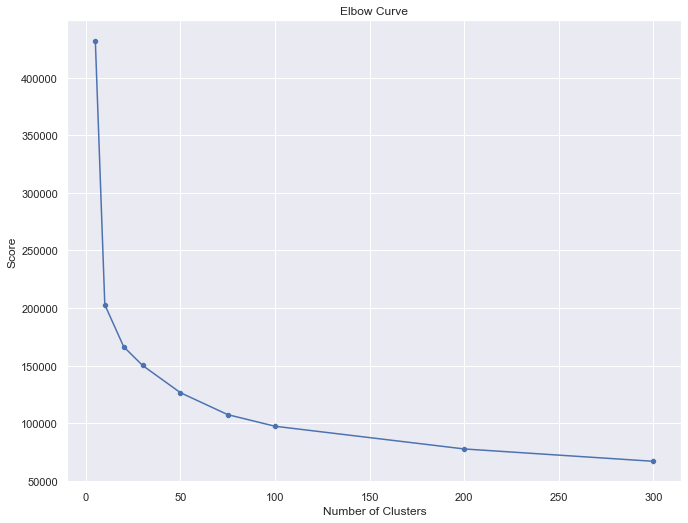

In [14]:
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

a partir de 10 clusters se comienza a estabilizar la reduccion en la suma total de cuadrados internos.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases). 

El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [17]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [18]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris[target] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


PCA

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [21]:
#entrenamiento del modelo
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(iris)

modelo_pca = pca_pipe.named_steps['pca']

In [23]:
pd.DataFrame(
    data = modelo_pca.components_,
    columns = iris.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
)

,sepal_length,sepal_width,petal_length,petal_width,species
PC1,0.444863,-0.233369,0.506043,0.496894,0.494624
PC2,0.381980,0.920972,0.028717,0.070637,-0.009368
PC3,-0.750625,0.287249,-0.028337,0.385446,0.452414
PC4,-0.141201,-0.003513,0.243058,0.612583,-0.738725
PC5,0.269839,-0.121757,-0.826569,0.473583,0.069756


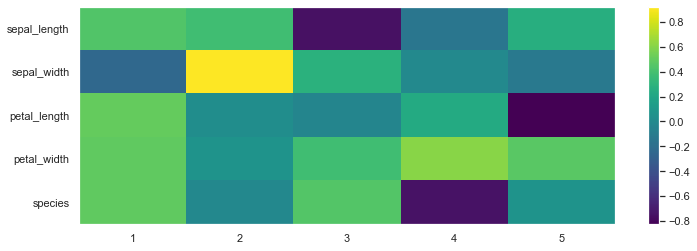

In [25]:
plt.figure(figsize=(12,4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(iris.columns)), iris.columns)
plt.xticks(range(len(iris.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

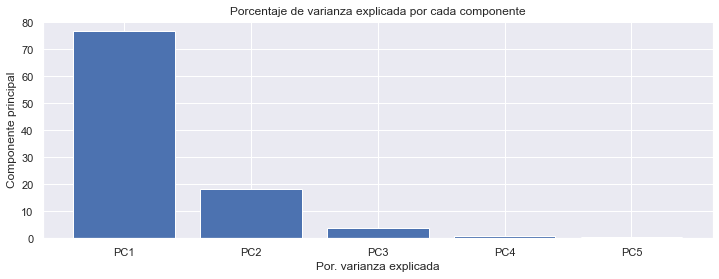

In [27]:
# graficar varianza por componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

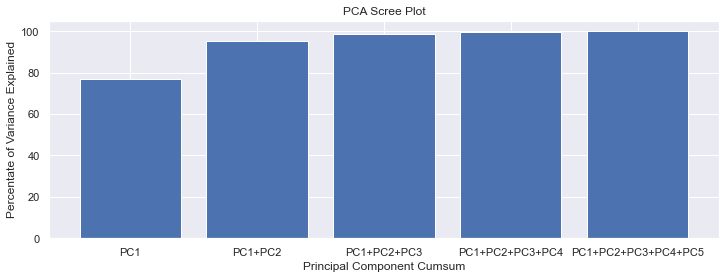

In [28]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+PC2+PC3+PC4', 'PC1+PC2+PC3+PC4+PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

si se emplean las dos primeras componentes solamente se explica sobre el 90% de la varianza 

In [30]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=iris)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
    index   = iris.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.576120,0.474499,-0.054364,-0.103224,0.032274
1,-2.415322,-0.678092,-0.203080,-0.064962,0.107023
2,-2.659333,-0.348282,0.112681,-0.046176,0.032555
3,-2.601991,-0.603306,0.134288,-0.000629,-0.066072
4,-2.683744,0.640220,0.102711,-0.086924,-0.028450


In [31]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(X=proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = iris.columns,
                    index   = iris.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(iris.head())

------------------
Valores originales
------------------


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1.110223e-16
1,4.9,3.0,1.4,0.2,1.110223e-16
2,4.7,3.2,1.3,0.2,2.220446e-16
3,4.6,3.1,1.5,0.2,2.220446e-16
4,5.0,3.6,1.4,0.2,2.220446e-16


---------------------
Valores reconstruidos
---------------------


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
# PCA
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']
    
embedding = PCA(n_components=2)
X_transform = embedding.fit_transform(X)
    
iris_pca = pd.DataFrame(X_transform,columns = ['PC1','PC2'])
iris_pca['species'] = y

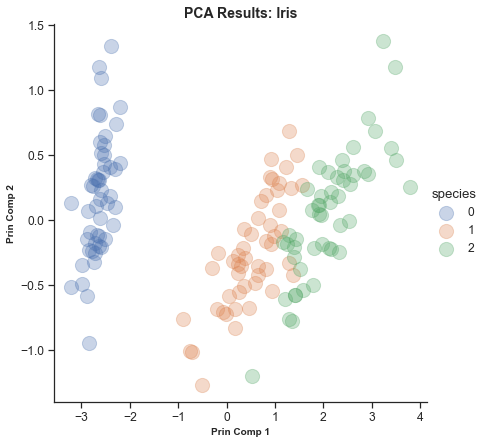

In [54]:
# Plot Digits PCA


# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='PC1',
           y='PC2',
           data=iris_pca,
           fit_reg=False,
           legend=True,
           height=6,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Iris', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

Al graficar las dos principales componentes podemos apereciar que aunque 1 y 2 esten cerca todas tienen la suficiente distancia para hacer distincion entre ellas. Podemos apreciar que el 0 esta claramente mas lejos de 1 y 2

TSNE

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
%matplotlib inline

In [34]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [49]:
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']
    
embedding = TSNE(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_tsne = pd.DataFrame(X_transform,columns = ['PC1','PC2'])
df_tsne['species'] = y

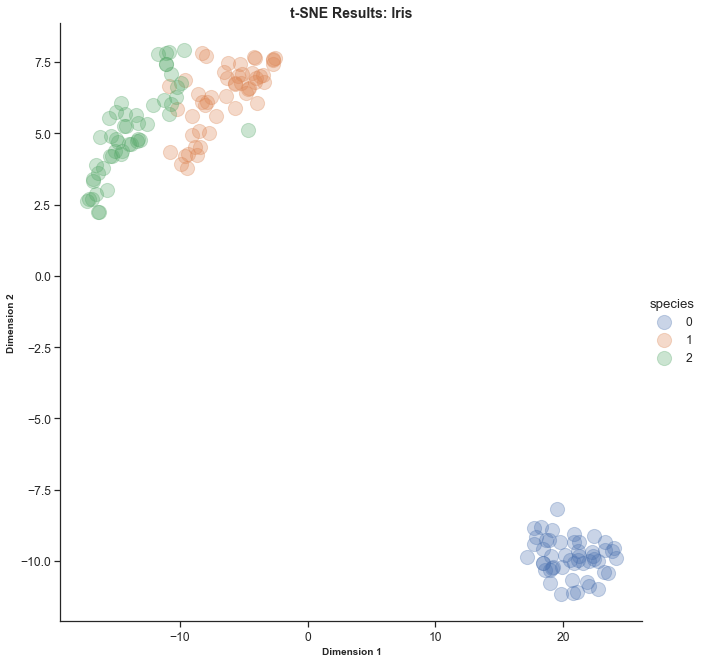

In [51]:
# Plot Digits t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='PC1',
           y='PC2',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Iris', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

Aqui podemos notar una mayor diferenciación se aprecia claramente que los datos en 0 estan mas alejados, ademas los datos en 1 y 2 tienen una cercania pero muestran tendencias distintas (2 esta por debajo de -10 y 1 por encima de -10)